# Shallow Machine Learning Introduction
- **s**ci**k**it-**learn** (a.k.a. sklearn)
- https://scikit-learn.org
- installation: https://scikit-learn.org/stable/install.html

## Catagories

| <font color='dodgerblue'>Regression</font> | <font color='dodgerblue'>Classification</font> | <font color='dodgerblue'>Clustering</font> | <font color='dodgerblue'>Dimension Reduction</font>|
| :-: | :-: | :-: | :-: |
| **Linear** | Logistic Regression | K-means | Principle Component Analysis |
| Polynomial | Support Vector Machine | Mean-Shift | Linear Discriminant Analysis |
| StepWise | Naive Bayes | DBScan | Gernalized Discriminant Analysis |
| Ridge | Nearest Neighbor | Agglomerative Hierachcial | Autoencoder |
| Lasso | Decision Tree | Spectral Clustering | Non-Negative Matrix Factorization |
| ElasticNet | Random Forest | Gaussian Mixture | UMAP |

<p><center><img alt="Classification" width="600" src="00_images/31_machine_learning/shallow_learning_depictions.jpg" align="center" hspace="10px" vspace="0px"></center></p>

**Image Source**: de Oliveira, E.C.L., da Costa, K.S., Taube, P.S., Lima, A.H. and Junior, C.D.S.D.S., 2022. Biological Membrane-Penetrating Peptides: Computational Prediction and Applications. Frontiers in Cellular and Infection Microbiology, 12, p.838259. (https://doi.org/10.3389/fcimb.2022.838259)

<hr style="border:2px solid gray"></hr>

## Linear Regression Refresher

**Idea**: <font color='dodgerblue'>Optimize the orientation of a line</font> that **best fits** **coupled/correlated parameters** 
- **1 dependent** and **1 independent**** variable: $y = m*x + b$
- optimize the **slope** and **y-intercept**
- a simple, but prominent technique in ML
- used frequently in supervised learning

**Example Data**
- vaccination effectiveness and dosage
- $\text{CO}_2$ emissions and engine size
- life expectancy and immunization coverage
- GPA and course attendance


Additional Info: https://en.wikipedia.org/wiki/Linear_regression

## Learning by example

**Example data**: housing prices across the United States

source: https://github.com/whoparthgarg/House-Price-Prediction (and https://www.kaggle.com/vedavyasv/usa-housing)

- **Avg. Area Income**: Average income of the city's residents where the house is located in
- **Avg. Area House Age**: Average age of houses within the same city
- **Avg. Area Number of Rooms**: Avgerage number of rooms for houses within the same city
- **Avg. Area Number of Bedrooms**: Average number of bedrooms for houses within the same city
- **Area Population**: Population of the city where the house is located in
- **Price**: Price of the house
- **Address**: Address for the house

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

The dataset (**usa_housing.csv**) can be downloaded from the git repository: https://github.com/karlkirschner/Scientific_Programming_Course

In [2]:
!head -2 usa_housing.csv

Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674


Rename the headers since the are very long

In [3]:
housing = pd.read_csv('usa_housing.csv', header=1,
                      names=['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address'])
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
housing.describe()

,income,age,rooms,bedrooms,population,price
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03
mean,68580.916075,5.977281,6.987788,3.981308,36166.131905,1.232107e+06
std,10657.929222,0.991547,1.005934,1.234260,9924.919201,3.531445e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61479.919569,5.322279,6.299156,3.140000,29406.506987,9.975356e+05
50%,68803.552077,5.970953,7.002864,4.050000,36200.372388,1.232872e+06
75%,75781.478131,6.650870,7.666100,4.490000,42865.210579,1.471389e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Observables - a.k.a. "Features"

Definitions of words used in ML...

What **features** do we want the machine **to learn from** for **making a prediction** of an **target observable**?

- <font color='dodgerblue'>features</font>: independent variables (`income`, `age`, `rooms`, `bedrooms`, `population`)
- <font color='dodgerblue'>target observable</font>: dependent variable (`price`)


Coding-wise, we can define the features like the following:

In [5]:
feature_list = ['income', 'age', 'rooms', 'bedrooms', 'population']

#### Visualize the data
Let's plot the features versus price to see what it might look like:

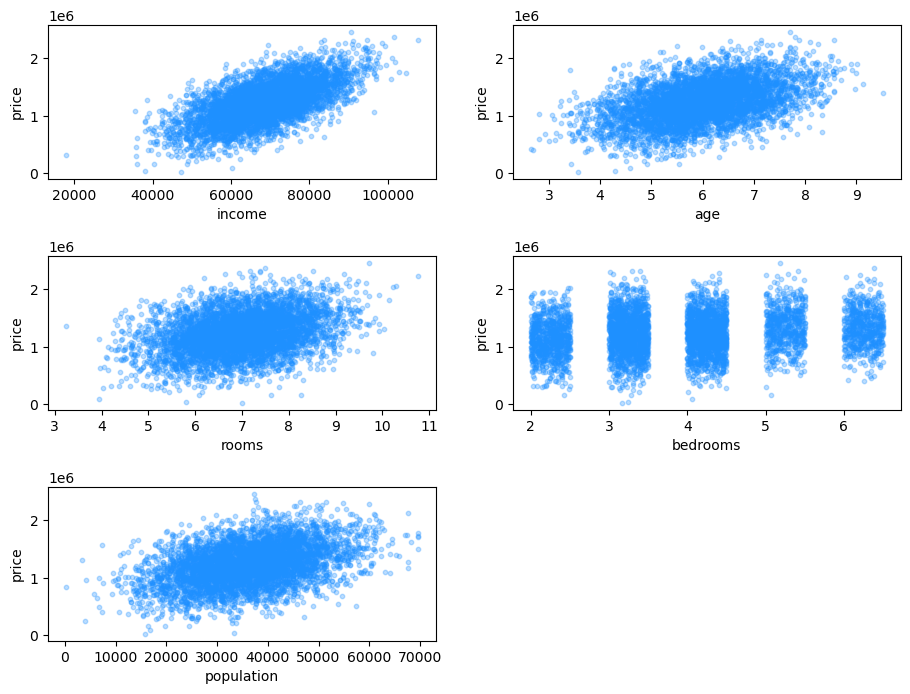

In [6]:
fig = plt.figure(figsize=(11, 8))

fig.subplots_adjust(wspace=0.2, hspace=0.5)

for count, feature in enumerate(feature_list):
    ax = fig.add_subplot(3, 2, count+1)  # first position can not be zero

    ax.set_xlabel(xlabel=feature)
    ax.set_ylabel(ylabel='price')

    ax.scatter(housing[feature], housing['price'], color='dodgerblue', s=10, alpha=0.3)

plt.show()

<hr style="border:1px solid gray"></hr>

## Linear Regression on a Single Feature (i.e., one-dimensional)

The **simplest scenario** is to focus on **1 feature** (e.g., `rooms`) and see if we can create a model for predicting a **house price**.

In [7]:
target = housing['price'].values
feature = housing['rooms'].values

### Training and Testing

- Good **data scholarship** means we need to **split our data** into a **training** and **test** sets. We do this by using the following scikit-learn funtion:

`train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

- Returns: a list containing train-test split of the data input.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target,
                                                                          test_size=0.25, train_size=0.75,
                                                                          random_state=1)

Let's double check the algorithm - we should have 25% of the data being researved for the future testing.

In [9]:
print(f'Length of the training data: {len(target_train)}')
print(f'Length of the test data: {len(target_test)}')

print(f'Fraction of data used for the test data set: '
      f'{len(target_test) / (len(target_train) + len(target_test)) :0.2f}')

Length of the training data: 3749
Length of the test data: 1250
Fraction of data used for the test data set: 0.25


#### Visualize the training and test data

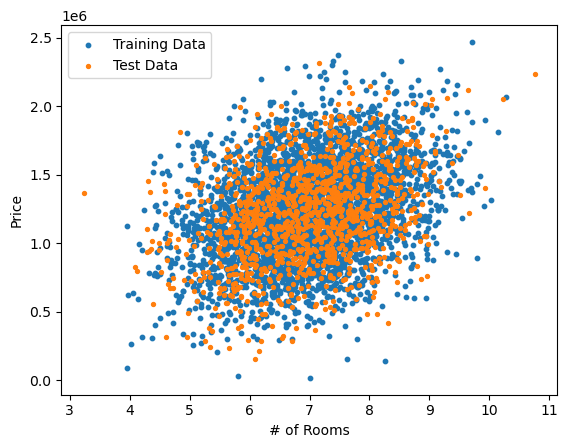

In [10]:
plt.figure()

plt.scatter(feature_train, target_train, s=10, label='Training Data')
plt.scatter(feature_test, target_test, s=8, label='Test Data')

plt.xlabel(xlabel='# of Rooms')
plt.ylabel(ylabel='Price')

plt.legend(loc='best')

plt.show()

#### Reshape the data
- scikit-learn's <font color='dodgerblue'>LinearRegression</font> requires the data to have a certain <font color='dodgerblue'>NumPy array shape</font>
- **Already Done**: the `target_train` and `target_test` are both already in their correct shape
- **Need to Do**:  reshape `feature_train` and `feature_test` (becuase it is a 1 feature)

Feature Train:

In [11]:
display(feature_train)
display(feature_train.shape)

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362])

(3749,)

Feature Test:

In [12]:
display(feature_test)
display(feature_test.shape)

array([6.57676266, 7.47055751, 7.09271404, ..., 7.33598472, 5.96123976,
       7.05452948])

(1250,)

Since we only have **one feature** (i.e., one column; number of rooms), the feature arrays need **reshaping to contain nested lists**.

**Note:** If we do not reshape the data, then in the next step (i.e., `model = reg.fit(X=features_train, y=target_train)`) we would obtain the following error:

`ValueError: Expected 2D array, got 1D array instead:
array=[7.76350224 6.67325638 6.39398078 ... 6.11019169 7.04733826 5.35511362].
Reshape your data using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.`

Numpy's reshape function: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
- One shape dimension can be -1
    - Then, the value is taken as the array length.`

In [13]:
display(feature_train)
display(feature_train.shape)

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362])

(3749,)

Reshape the data:

In [14]:
feature_train = np.reshape(feature_train, (-1, 1))
features_test = np.reshape(feature_test, (-1, 1))

display(feature_train)
display(feature_train.shape)

array([[7.76350224],
       [6.67325638],
       [6.39398078],
       ...,
       [6.11019169],
       [7.04733826],
       [5.35511362]])

(3749, 1)

### Least Squared Linear Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- `sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)`

We will train in two steps
1. Define our **callable model**
    - linear regression
    - fit the y-intercept

In [15]:
reg = LinearRegression(fit_intercept=True)

2. Have the model **learn** from our data (i.e., optimize for a best fit)
     - This is the creation of a **model** that represents our training data

In [16]:
model = reg.fit(X=feature_train, y=target_train)

In [17]:
print(type(model))
model

<class 'sklearn.linear_model._base.LinearRegression'>


LinearRegression()

### Making predictions using your model

- `predict`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
    - **Args**: np.ndarray of feature(s)
    - **Return**: predicted target value

**Create a new/independent/unknown house**:
- Known feature: <font color='dodgerblue'>5 rooms</font>
- Predict target: <font color='dodgerblue'>Cost</font>

In [18]:
new_house_feature = np.array([ [5] ])

display(new_house_feature)
display(new_house_feature.shape)

array([[5]])

(1, 1)

In [19]:
model.predict(X=new_house_feature)

array([1001101.21587117])

In [20]:
print(f'Thus, the house with 5 rooms is predicted to cost ca. {model.predict(X=new_house_feature)[0]:0.1e} dollars.')

Thus, the house with 5 rooms is predicted to cost ca. 1.0e+06 dollars.


Demonstrate if we had 2 new houses:
- 5 rooms
- 2 rooms

In [21]:
new_houses_feature = np.array([ [5], [2] ])
display(new_houses_feature)
display(new_houses_feature.shape)

model.predict(X=new_houses_feature)

array([[5],
       [2]])

(2, 1)

array([1001101.21587117,  648896.73256613])

In [22]:
print(f'''Thus, the houses with 5 and 2 rooms are predicted to cost ca.
      $ {model.predict(X=new_houses_feature)[0]:0.1e} and
      $ {model.predict(X=new_houses_feature)[1]:0.1e}, respectively.''')

Thus, the houses with 5 and 2 rooms are predicted to cost ca.
      $ 1.0e+06 and
      $ 6.5e+05, respectively.


#### Evaluate the fit using the Coefficient of Determination ($R^2$)  - goodness-of-fit
- https://en.wikipedia.org/wiki/Coefficient_of_determination

Two ways to obtain this value:
1. `score`
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
    - `score(X, y, sample_weight=None)`
    - `sample_weight`: setting the relative importance of the data


2. `r2_score`
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
    - `r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)`
    - `force_finite`: use when y_true is constant

- Score = 1: **Best possible model**
    
- Score = 0: **Poor model**

- Score > 1 or < 0: **Wrong model** (or **wrong constraints applied**)

Using the housing **test data** set:

In [23]:
display(features_test.shape)

predict = model.predict(X=features_test)
predict

(1250, 1)

array([1186215.50861122, 1291148.35942672, 1246788.97167495, ...,
       1275349.31239641, 1113952.20006345, 1242306.04755028])

- `score`

In [24]:
model.score(X=features_test, y=target_test, sample_weight=None)

0.1173486982720563

- `r2_score`

In [25]:
r2_score(y_true=target_test, y_pred=predict, multioutput='uniform_average', sample_weight=None, force_finite=True)

0.1173486982720563

#### Overlay the scattered data with the model's prediction
- recall that the model is a **linear regression** - straight line

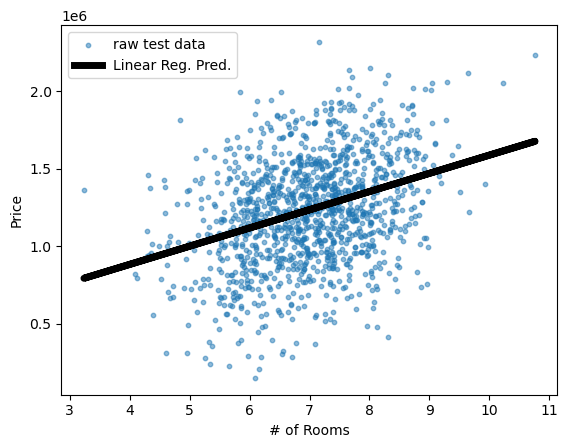

In [26]:
plt.figure()

plt.scatter(features_test, target_test, s=10, alpha=0.5, label='raw test data')
plt.plot(features_test, predict, color='black', linewidth=5, linestyle='solid', label='Linear Reg. Pred.')

plt.xlabel(xlabel='# of Rooms')
plt.ylabel(ylabel='Price')

plt.legend(loc='best')

plt.show()

The polynomial `coefficients` (i.e. `m`) and `y-intercept` of the resulting fitted line:

In [27]:
print(f'Coefficients: {model.coef_}')
print(f'y-intercept: {model.intercept_}\n')

print(f'''Linear regression line:
      y(x) = price(room) = {model.coef_[0]:0.2e}x + {model.intercept_:0.2e}''')

Coefficients: [117401.49443501]
y-intercept: 414093.74369610054

Linear regression line:
      y(x) = price(room) = 1.17e+05x + 4.14e+05


#### Proof-of-concept

- using the **line equation**, our optimized `coefficients` and `y-intercept`, we can predict the price.

First, recall from above that this was done using the `predict` function:

In [28]:
model.predict(X=np.array([ [5] ]))

array([1001101.21587117])

Now using an optimized straight line equation:

In [29]:
price = (model.coef_[0] * 5) + model.intercept_
f'{price}'

'1001101.2158711693'

<hr style="border:1px solid gray"></hr>

## Create a Model from Two Features

The equation that defines a line that has two "features" (i.e., two independent variables) is 

$y = m_1*x_1 + m_2*x_2 + b$

- $x_1$ and $x_2$ = data for the two features
- $m_1$ and $m_2$ = the coefficients
- $b$ = y-intercept


- Extend this to `n` features (i.e., in multiple-dimensional space).

- Let's generate a model that uses 5 features:
    - 'income', 'age', 'rooms', 'bedrooms', and 'population'

In [30]:
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [31]:
two_features = ['age', 'rooms']

display(two_features)
display(housing[two_features].shape)

['age', 'rooms']

(4999, 2)

**Notice**: since there are more than **1 features** (i.e., 2 Pandas DataFrame columns), we can pass the **DataFrame directly to `train_test_split`** without reshaping them (unlike the above example using 1 feature).

In [32]:
features_train, features_test, target_train, target_test = train_test_split(housing[two_features], target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

features_train

,age,rooms
3092,5.347527,7.763502
632,6.371179,6.673256
577,5.241163,6.393981
4133,5.739553,7.013864
2625,6.165033,7.085072
...,...,...
2895,7.181744,4.419215
2763,6.742828,6.604335
905,6.010154,6.110192
3980,4.069650,7.047338


In [33]:
reg = LinearRegression(fit_intercept=True)

In [34]:
model = reg.fit(X=features_train, y=target_train)

model.score(X=features_test, y=target_test)

0.3118247657615971

In [35]:
predict = model.predict(X=features_test)
predict

array([1353188.28612759, 1527233.54154822, 1563438.45256345, ...,
       1388865.46294633,  705620.78631846, 1231882.19625501])

Create a plot function that allows us to visualize multiple price vs. features.

In [36]:
def plot_features(feature_list: list,
                  target: np.ndarray,
                  feature_df: pd.DataFrame,
                  predict: np.ndarray=None):
    ''' Create a plot with multiple subplots displayed in two columns.
    
        Args
            feature_list: y-axis features to be extracted from feature_df (i.e. column names)
            target: x-axis data
            feature_df: y-axis data
            predict: predicted values based on machine learning
        Returns
            plot
        
        Library dependencies
            matplotlib
            numpy
            pandas
    '''
    if not isinstance(feature_list, list):
        raise TypeError('Input features are not given as a list.')
    elif not isinstance(target, np.ndarray):
        raise TypeError('Target values are not given as a NumPy array.')
    elif not isinstance(feature_df, pd.DataFrame):
        raise TypeError('feature_df is not given as a Pandas dataframe.')
    elif not isinstance(predict, np.ndarray):
        raise TypeError('predict is not given as a NumPy array.')
    else:  

        number_of_rows = int(np.ceil(len(feature_list)/2))  # number of rows for a 2 column plot

        fig = plt.figure(figsize=(11, 3*number_of_rows))    # same height subplots regardless of rows

        fig.subplots_adjust(wspace=0.2, hspace=0.5)

        for count, feature in enumerate(feature_list):    
            ax = fig.add_subplot(number_of_rows, 2, count+1)  # first position can not be zero

            ax.set_xlabel(xlabel=feature)
            ax.set_ylabel(ylabel='price')

            ax.scatter(feature_df[feature], target, color='dodgerblue', s=20, alpha=0.3, label='known')

            if predict is not None:
                ax.scatter(feature_df[feature], predict, color='orange', s=10, alpha=0.5, linestyle='solid', label='prediction')
            
            ax.legend(loc='best')

        plt.show()

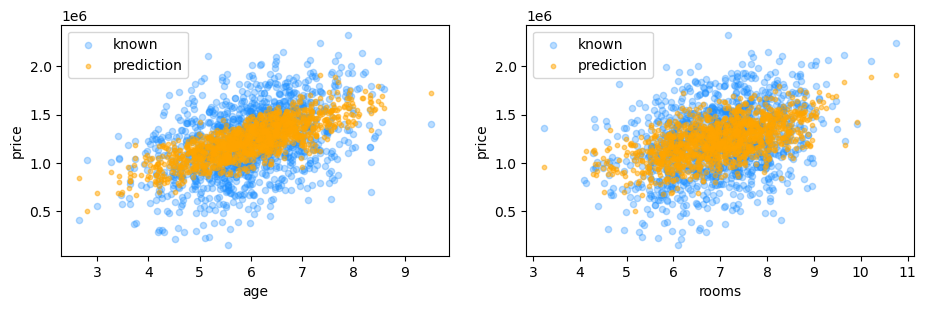

In [37]:
plot_features(feature_list=two_features, feature_df=features_test, target=target_test, predict=predict)

#### What would the resulting two-feature linear equation look like, for one of the input houses?

$y = (m_1*x_1) + (m_2*x_2) + (b)$

In [38]:
print(f'Coefficients: {model.coef_}')
print()
print(f'y-intercept: {model.intercept_}')

Coefficients: [163659.78370564 117927.87267283]

y-intercept: -567872.2616741159


In [39]:
print(f'y = ({model.coef_[0]:0.2e} * x) \n'\
      f'  + ({model.coef_[1]:0.2e} * x) \n'\
      f'  + {model.intercept_:0.2e}')

y = (1.64e+05 * x) 
  + (1.18e+05 * x) 
  + -5.68e+05


#### Apply it to an individual house (i.e., the first data entry) to see how it repoduces the actual target value.

Use Pandas `loc[[]]` to isolate a row:

In [40]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


Recall that we can use Pandas `loc[[ , ]]` to isolate rows and columns:

In [41]:
display(housing.loc[[0], ['age', 'rooms', 'price']])

,age,rooms,price
0,6.0029,6.730821,1.505891e+06


Using our **ML model**:

In [42]:
price = model.predict(X=housing.loc[[0], ['age', 'rooms']])

f'{price[0]:0.2e}'

'1.21e+06'

Alternatively, using the **equation for a line**

$y = (m_1*x_1) + (m_2*x_2) + (b)$

In [43]:
print(f'y = ({model.coef_[0]:0.2e} * {float(housing["age"].iloc[0]):0.2e})'\
      f' + ({model.coef_[1]:0.2e} * {float(housing["rooms"].iloc[0]):0.2e})'\
      f' + {model.intercept_:0.2e}')

y = (1.64e+05 * 6.00e+00) + (1.18e+05 * 6.73e+00) + -5.68e+05


In [44]:
predicted_price = (model.coef_[0] * float(housing["age"].iloc[0]))     \
                + (model.coef_[1] * float(housing["rooms"].iloc[0]))        \
                + model.intercept_

f'{predicted_price:0.2e}'

'1.21e+06'

In [45]:
actual_price = housing["price"].iloc[0]

print(f'The listed price in the dataset is: {actual_price:0.2e}, '\
      f'a difference of {actual_price-predicted_price:0.2e}.')

The listed price in the dataset is: 1.51e+06, a difference of 2.98e+05.


##### Sidenote: plot the line corresponding to each subfeature

1. Create a straight line for plotting
2. Scatter plot the data and overlay with the straight lines
3. Do this in a loop that cycles over the features

Features:

In [46]:
two_features

['age', 'rooms']

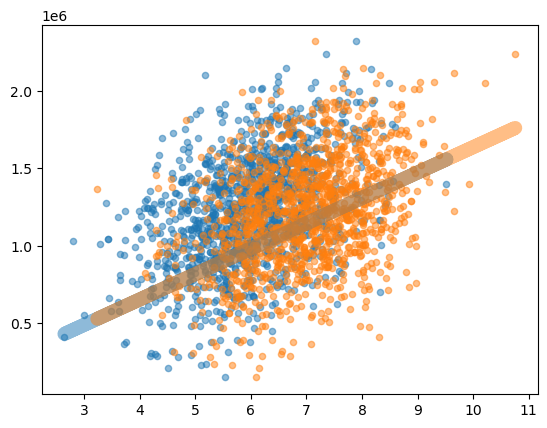

In [47]:
plt.figure()

for observable in two_features:
    observable_line = (model.coef_[0] * features_test[observable])
    
    plt.scatter(features_test[observable], target_test, s=20, alpha=0.5)
    plt.plot(features_test[observable], observable_line, linewidth=10, alpha=0.5, linestyle='solid')

<hr style="border:1px solid gray"></hr>

### Model from five features

In [48]:
five_features = ['income', 'age', 'rooms', 'bedrooms', 'population']

display(housing[five_features])
display(housing[five_features].shape)

,income,age,rooms,bedrooms,population
0,79248.642455,6.002900,6.730821,3.09,40173.072174
1,61287.067179,5.865890,8.512727,5.13,36882.159400
2,63345.240046,7.188236,5.586729,3.26,34310.242831
3,59982.197226,5.040555,7.839388,4.23,26354.109472
4,80175.754159,4.988408,6.104512,4.04,26748.428425
...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035
4995,78491.275435,6.999135,6.576763,4.02,25616.115489
4996,63390.686886,7.250591,4.805081,2.13,33266.145490
4997,68001.331235,5.534388,7.130144,5.44,42625.620156


(4999, 5)

In [49]:
features_train, features_test, target_train, target_test = train_test_split(housing[five_features], target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

In [50]:
model = reg.fit(X=features_train, y=target_train)

model.score(X=features_test, y=target_test)

0.9187244501899396

In [51]:
predict = model.predict(X=features_test)
predict

array([1406603.00612443, 1614010.33868905, 1450190.49885801, ...,
       1208628.34023587,  476142.09777603,  909865.65577715])

Let's visualize how well the ML'ed predicted values in comparison to the original `test` input data:

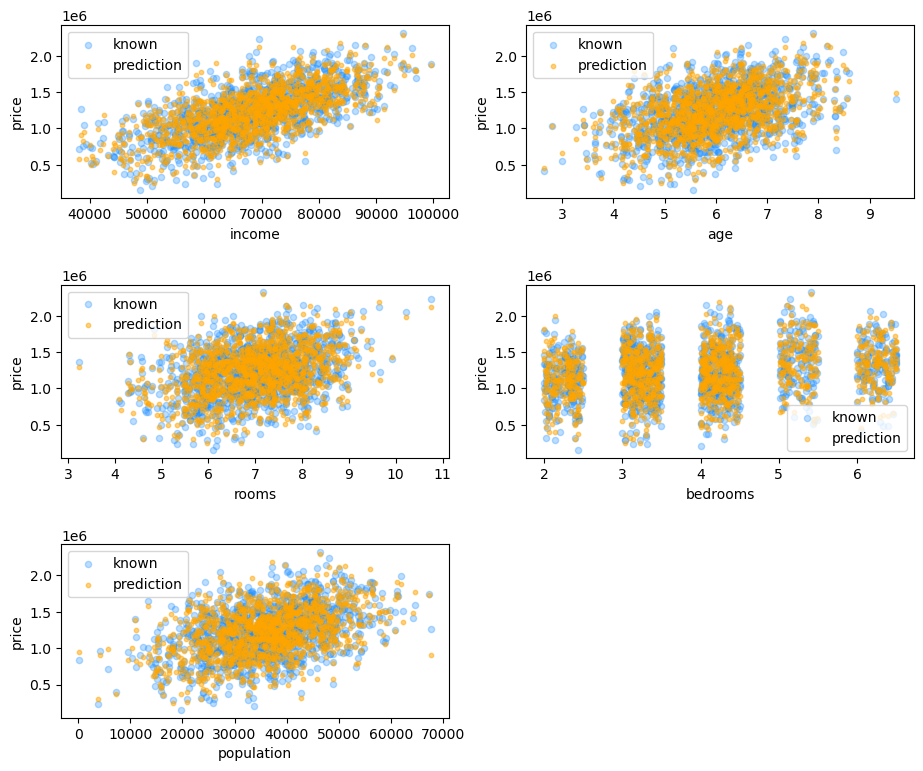

In [52]:
plot_features(feature_list=five_features, feature_df=features_test, target=target_test, predict=predict)

#### Apply it to an individual house (i.e., the first data entry) to see how it repoduces the actual target value.

In [53]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


Using our **ML model**:

In [54]:
price = model.predict(X=housing.loc[[0], five_features])

f'{price[0]:0.3e}'

'1.496e+06'

Alternatively, using the **equation for a line**:

$y = (m_1*x_1) + (m_2*x_2) + (m_3*x_3) + (m_4*x_4) + (m_5*x_5) + (b)$

In [55]:
print(f'''  y = ({model.coef_[0]:0.2e} * {float(housing["income"].iloc[0]):0.2e})
    + ({model.coef_[1]:0.2e} * {float(housing["age"].iloc[0]):0.2e})
    + ({model.coef_[2]:0.2e} * {float(housing["rooms"].iloc[0]):0.2e})
    + ({model.coef_[3]:0.2e} * {float(housing["bedrooms"].iloc[0]):0.2e})
    + ({model.coef_[4]:0.2e} * {float(housing["population"].iloc[0]):0.2e})
    + {model.intercept_:0.2e}''')

  y = (2.16e+01 * 7.92e+04)
    + (1.66e+05 * 6.00e+00)
    + (1.19e+05 * 6.73e+00)
    + (1.48e+03 * 3.09e+00)
    + (1.52e+01 * 4.02e+04)
    + -2.63e+06


In [56]:
price = (model.coef_[0] * float(housing["income"].iloc[0]))     \
      + (model.coef_[1] * float(housing["age"].iloc[0]))        \
      + (model.coef_[2] * float(housing["rooms"].iloc[0]))      \
      + (model.coef_[3] * float(housing["bedrooms"].iloc[0]))   \
      + (model.coef_[4] * float(housing["population"].iloc[0])) \
      + model.intercept_

f'{price:0.3e}'

'1.496e+06'

Now we see very good agreement between the model predicted value and the target `$ 1.506e+06` value.

<hr style="border:1px solid gray"></hr>

#### How do you run the model for a new house?

1. Create a new dataframe that provides the house's features
2. Use `predict` to generate a predicted value

In [57]:
new_house_features = pd.DataFrame(np.array([ [8.00e4, 6.5, 7.0, 4.0, 40.0e3 ] ]),
                                  columns=five_features)

display(new_house_features)

,income,age,rooms,bedrooms,population
0,80000.0,6.5,7.0,4.0,40000.0


In [58]:
new_house_price = model.predict(X=new_house_features)
new_house_price

array([1625986.60826008])

In [59]:
display(new_house_features)

print(f'The cost of the above house is predicted to be: ${float(new_house_price[0]):0.3e}.')

,income,age,rooms,bedrooms,population
0,80000.0,6.5,7.0,4.0,40000.0


The cost of the above house is predicted to be: $1.626e+06.


<hr style="border:1px solid gray"></hr>

## Clustering

https://scikit-learn.org/1.5/modules/clustering.html

**<font color='dodgerblue'>Distances between Points</font>**

- **K-Means** (widely used)
    - General-purpose, even cluster size, flat geometry, not too many clusters, inductive

- **Mean-shift**
    - Many clusters, uneven cluster size, non-flat geometry, inductive
    - Distances between points

- **Ward hierarchical clustering**
    - Many clusters, possibly connectivity constraints, transductive
    - Distances between points

- **OPTICS**
    - Non-flat geometry, uneven cluster sizes, variable cluster density, outlier removal, transductive
    - Distances between points

- **Bisecting K-Means**
    - General-purpose, even cluster size, flat geometry, no empty clusters, inductive, hierarchical
    - Distances between points

**<font color='dodgerblue'>Distances between nearest points</font>**

- **DBSCAN**
    - Non-flat geometry, uneven cluster sizes, outlier removal, transductive


- **HDBSCAN**
    - Non-flat geometry, uneven cluster sizes, outlier removal, transductive, hierarchical, variable cluster density

**<font color='dodgerblue'>Graph distance (e.g. nearest-neighbor graph)</font>**

- **Affinity propagation**
    - Many clusters, uneven cluster size, non-flat geometry, inductive

- **Spectral clustering**
    - Few clusters, even cluster size, non-flat geometry, transductive

**<font color='dodgerblue'>Others</font>**

- **Gaussian mixtures**
    - Flat geometry, good for density estimation, inductive
    - Mahalanobis distances to centers


- **BIRCH**
    - Large dataset, outlier removal, data reduction, inductive	
    - Euclidean distance between points


- **Agglomerative clustering**
    - Many clusters, possibly connectivity constraints, non-Euclidean distances, transductive
    - Any pairwise distance

#### kmeans

`sklearn.cluster.k_means(X, n_clusters, *, sample_weight=None, init='k-means++', n_init='auto', max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, algorithm='lloyd', return_n_iter=False)`

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html
- `X` needs to have data passed in a **2-dimensional container** (e.g., np.ndarray[[]]: `X=np.array([[1, 2], [1, 4], [1, 0]`)

**Returns**:
- centroids: cluster centers (i.e., coordinates)
- labels: the centroid index that each data point belongs to
- inertia: a metric for how well the data points belong to the clusters:
    - "sum of squared distances to the closest centroid for all observations in the training set"

In [60]:
import seaborn as sns
from sklearn.cluster import k_means

Let remind ourselves what the housing DataFrame looks like:

In [61]:
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


Remember that we can access specific columns in the DataFrame via:

In [62]:
housing[['income', 'rooms', 'price']]

,income,rooms,price
0,79248.642455,6.730821,1.505891e+06
1,61287.067179,8.512727,1.058988e+06
2,63345.240046,5.586729,1.260617e+06
3,59982.197226,7.839388,6.309435e+05
4,80175.754159,6.104512,1.068138e+06
...,...,...,...
4994,60567.944140,6.137356,1.060194e+06
4995,78491.275435,6.576763,1.482618e+06
4996,63390.686886,4.805081,1.030730e+06
4997,68001.331235,7.130144,1.198657e+06


##### **Example 1**: how it **fails** when not including the properly shaped `X`.
- housing['income']

In [63]:
centroids, labels, inertia = k_means(X=housing['income'], n_clusters=3, random_state=0, n_init='auto')

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

##### Example 2: a properly shaped `X`:
- `X=housing[['income']]`

In [64]:
centroids, labels, inertia = k_means(X=housing[['income']], n_clusters=3, random_state=0, n_init='auto')

In [65]:
display(centroids)
display(labels)
display(inertia)

array([[69101.72696199],
       [55923.52727571],
       [81892.2824259 ]])

array([2, 1, 0, ..., 0, 0, 0], dtype=int32)

110601829761.58252

##### Example 3: of a properly shaped `X`:
- `X=housing[['income', 'population']]`
- Adding complexity now with clustering based on two features

In [66]:
cluster_features = ['income', 'population']
centroids, labels, inertia = k_means(X=housing[cluster_features], n_clusters=3, random_state=0, n_init='auto')

In [67]:
display(centroids)
display(labels)
display(inertia)

array([[73045.38377726, 26897.91226697],
       [57708.71903075, 37729.28037849],
       [75810.8470469 , 44231.92998787]])

array([2, 1, 1, ..., 1, 2, 2], dtype=int32)

486972530171.2468

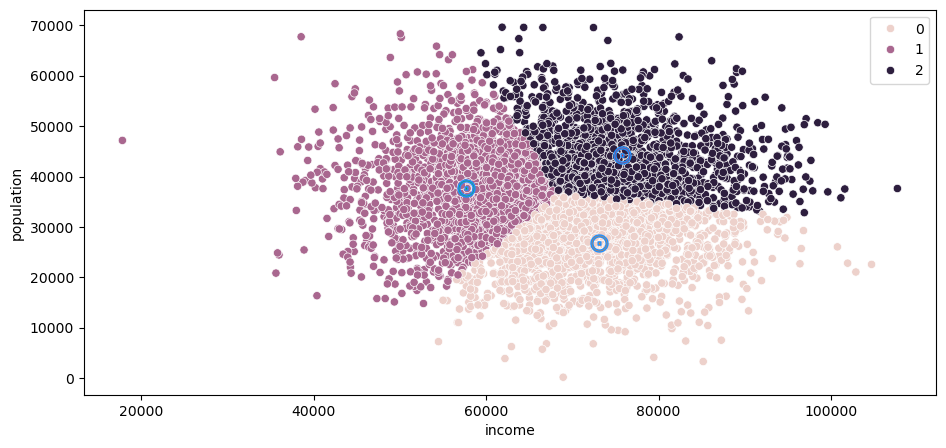

In [68]:
plt.figure(figsize=(11, 5))
sns.scatterplot(data=housing, x='income', y='population', hue=labels)

for centroid_centers in centroids:
    plt.scatter(x=centroid_centers[0], y=centroid_centers[1],
                marker = "$\odot$", s=150, edgecolor='DodgerBlue', linewidths = 1)

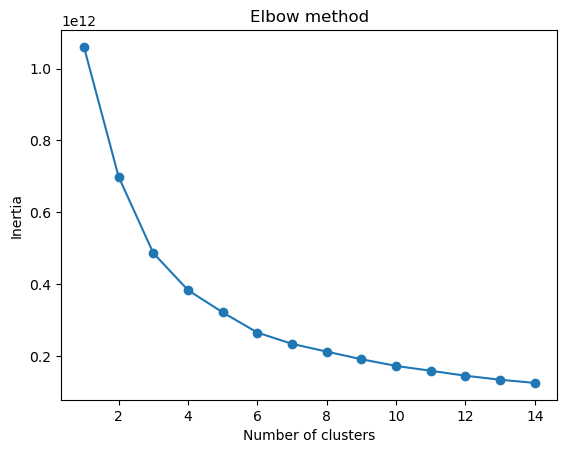

In [69]:
# cluster_features = ['bedrooms', 'rooms']

inertias_list = []

cluster_number = range(1, 15)

for i in cluster_number:
    centroids, labels, inertia = k_means(X=housing[cluster_features], n_clusters=i, random_state=0, n_init='auto')
    inertias_list.append(inertia)

plt.plot(cluster_number, inertias_list, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

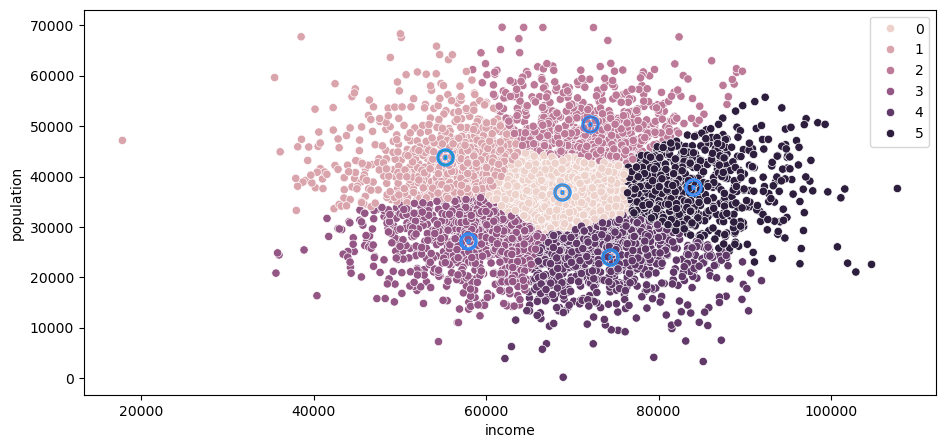

In [71]:
centroids, labels, inertia = k_means(X=housing[cluster_features], n_clusters=6, random_state=0, n_init='auto')

plt.figure(figsize=(11, 5))

# sns.scatterplot(data=housing, x='bedrooms', y='rooms', hue=labels)
sns.scatterplot(data=housing, x='income', y='population', hue=labels)

for centroid_centers in centroids:
    plt.scatter(x=centroid_centers[0], y=centroid_centers[1],
                marker = "$\odot$", s=150, edgecolor='DodgerBlue', linewidths = 1)

<hr style="border:1px solid gray"></hr>

## Dimensionality Reduction

"Dimensionality reduction is a method for representing a given dataset using a lower number of features (i.e. dimensions) while still capturing the original data’s meaningful properties."

**Source**: https://www.ibm.com/topics/dimensionality-reduction

- helps us understand the data better
    - visualization
- improves machine learning performance
- can help the data analysis by reducing the original data's noise


- https://scikit-learn.org/stable/modules/unsupervised_reduction.html

In [72]:
from sklearn import decomposition

In [73]:
feature_targets_df = housing[['income', 'age', 'rooms', 'bedrooms', 'population']]
display(feature_targets_df)

,income,age,rooms,bedrooms,population
0,79248.642455,6.002900,6.730821,3.09,40173.072174
1,61287.067179,5.865890,8.512727,5.13,36882.159400
2,63345.240046,7.188236,5.586729,3.26,34310.242831
3,59982.197226,5.040555,7.839388,4.23,26354.109472
4,80175.754159,4.988408,6.104512,4.04,26748.428425
...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035
4995,78491.275435,6.999135,6.576763,4.02,25616.115489
4996,63390.686886,7.250591,4.805081,2.13,33266.145490
4997,68001.331235,5.534388,7.130144,5.44,42625.620156


#### PCA

Look for a feature combination (in the reduced dimensions) that best captures the variance of the original features.

`decomposition.PCA` - sets up your PCA analysis with how many dimension are wanted

`class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)`

-`n_components`
    - Number of components to keep - how many dimensions is the data reduced to
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [74]:
pca = decomposition.PCA(n_components=4)

`fit(X, y=None)`
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit

In [75]:
clusters = pca.fit_transform(feature_targets_df)
clusters

array([[ 1.01627060e+04,  5.15512975e+03, -8.92654981e-01,
         2.64537767e-02],
       [-7.32835823e+03, -8.99598269e+01,  1.80535396e+00,
        -1.34702257e-01],
       [-4.99998097e+03, -2.42008637e+03, -1.36448997e+00,
         1.23368886e+00],
       ...,
       [-4.84005522e+03, -3.45286342e+03, -2.74020031e+00,
         1.29655050e+00],
       [-1.28602050e+03,  6.35665464e+03,  1.31494467e+00,
        -4.08415361e-01],
       [-4.18764542e+03,  9.93508647e+03, -5.63855126e-03,
         4.18421391e-02]])

In [76]:
clusters.shape

(4999, 4)

In [77]:
pca_1 = clusters[0:100, 0] # first 100 rows of column 0
pca_2 = clusters[0:100, 1] # column 1
pca_3 = clusters[0:100, 2] # column 2
pca_4 = clusters[0:100, 3] # column 2

Text(0, 0.5, 'pc3')

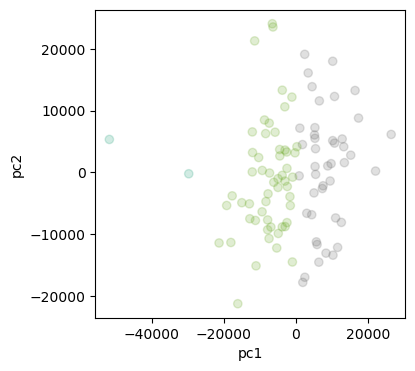

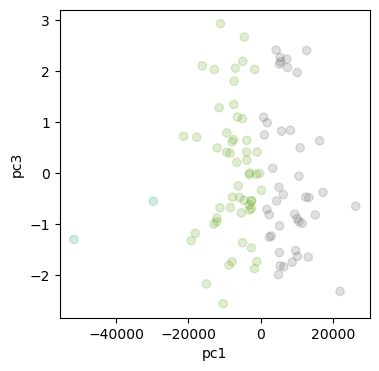

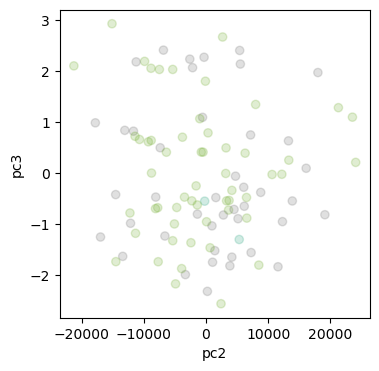

In [78]:
plt.figure(figsize=(4, 4))
plt.scatter(pca_1, pca_2, c=pca_1, cmap=plt.get_cmap('Dark2', 3), alpha=0.2)
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.figure(figsize=(4, 4))
plt.scatter(pca_1, pca_3, c=pca_1, cmap=plt.get_cmap('Dark2', 3), alpha=0.2)
plt.xlabel('pc1')
plt.ylabel('pc3')

plt.figure(figsize=(4, 4))
plt.scatter(pca_2, pca_3, c=pca_1, cmap=plt.get_cmap('Dark2', 3), alpha=0.2)
plt.xlabel('pc2')
plt.ylabel('pc3')

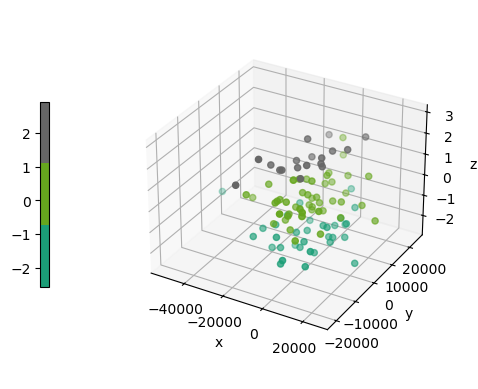

In [79]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

fig = ax.scatter(pca_1, pca_2, pca_3, c=pca_3, cmap=plt.get_cmap('Dark2', 3))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_box_aspect(None, zoom=0.85)

plt.colorbar(fig, shrink=0.5, location='left')